In [144]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import simpson

plt.rcParams["figure.dpi"] = 200

N = 1000
vwell = np.full(N, -1)
gammaSquared = 200


In [145]:
def kSquared(energy, potential):
    return gammaSquared * (energy - potential)

def nextPsi(energy, potential, kPrevSquared, kPrevPrevSquared, psiPrev, psiPrevPrev):
    l = 1/N
    
    f1 = 2*(1 - 5/12 * l**2 * kPrevSquared) * psiPrev
    f2 = (1 + 1/12 * l**2 * kPrevPrevSquared) * psiPrevPrev
    f3 = 1 + 1/12 * l**2 * kSquared(energy, potential)
    
    return (f1 - f2) / f3
    

def integratePsi(energy, v):
    psi = np.zeros(N)
    psi[1] = 1e-4
    for i in range(2, N):
        psi[i] = nextPsi(energy, v[i],
            kSquared(energy, v[i-1]),
            kSquared(energy, v[i-2]),
            psi[i-1], psi[i-2]
            )
    return psi

def normalize(psi):
    integral = simpson(psi**2, dx=1/N)
    return psi/np.sqrt(integral)

def shoot(energy, v, tol=5e-4):
    de = 5e-3
    e = energy

    prevLastPsi = 0

    while(abs(de) > tol):
        psi = integratePsi(e, v)
        psi = normalize(psi)
        
        if psi[-1] * prevLastPsi < 0:
            de = -de/2

        prevLastPsi = psi[-1]
        e += de

    return e

def d2(f):
    res = np.zeros(N)
    for i in range(1, N-1):
        res[i] = N**2 * (f[i-1] - 2 * f[i] + f[i+1])

    return res

## 3 & 4  -- Shooting method

[-0.9505533447265622, -0.8022128906249995, -0.5549783935546865, -0.20884985351562363, 0.2361715087890642, 0.7800869140625023, 1.4228963623046806, 2.1645998535156026, 3.0051961669921474, 3.9446865234374404]


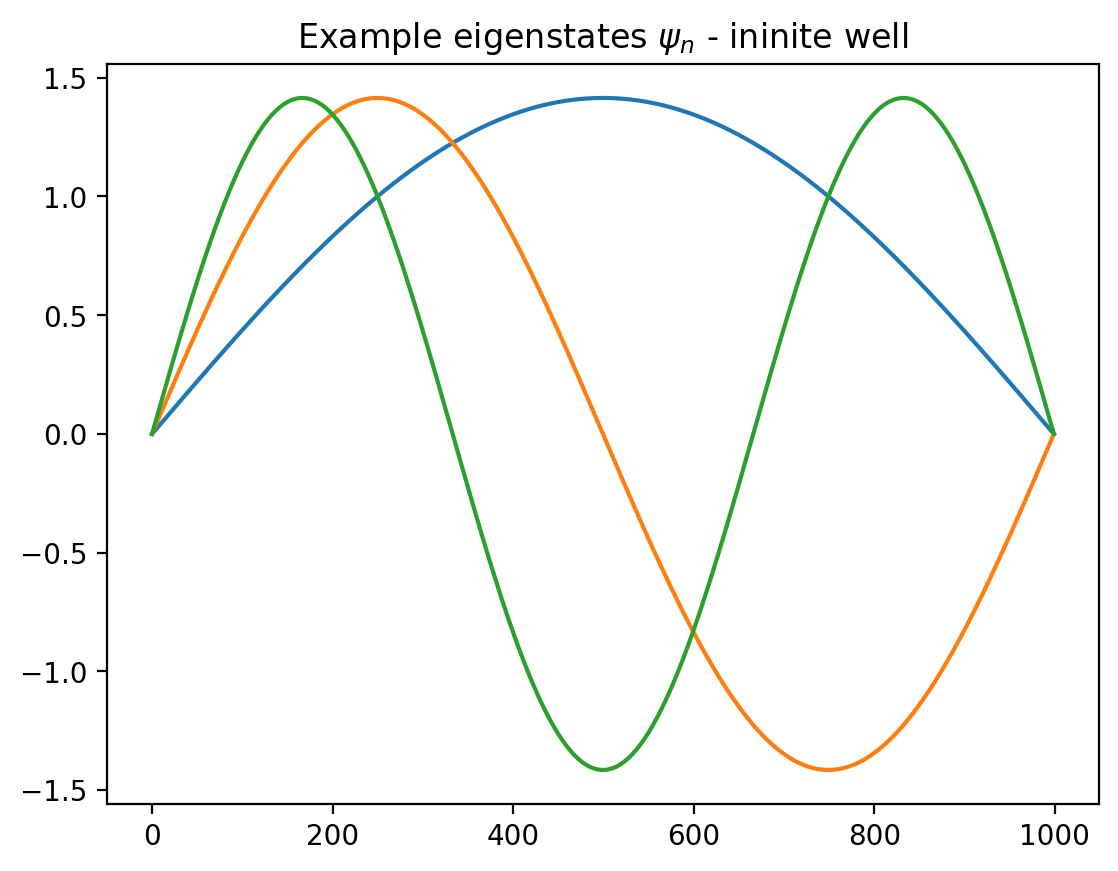

In [146]:
energy = -0.999
eigenEnergies = []
for i in range(10):
    energy = shoot(energy+5e-3, vwell, tol=1e-6)
    eigenEnergies.append(energy)

    if i<3:
        psi = integratePsi(energy, vwell)
        psi = normalize(psi)
        plt.plot(psi)

plt.title("Example eigenstates " + r'$\psi_n$' + " - ininite well")
print(eigenEnergies)

## 6 -- Uncertainty relation

#### analytic solution energies:
[-0.9506519780, -0.8026079120, -0.5558678020, -0.2104316479, 0.2337005501, 0.7765287922, 1.418053078, 2.158273408, 2.997189782, 3.934802201]

[-0.9505533447265622, -0.8022128906249995, -0.5549783935546865, -0.20884985351562363, 0.2361715087890642, 0.7800869140625023, 1.4228963623046806, 2.1645998535156026, 3.0051961669921474, 3.9446865234374404]


Text(-1.2, 1, '1/2')

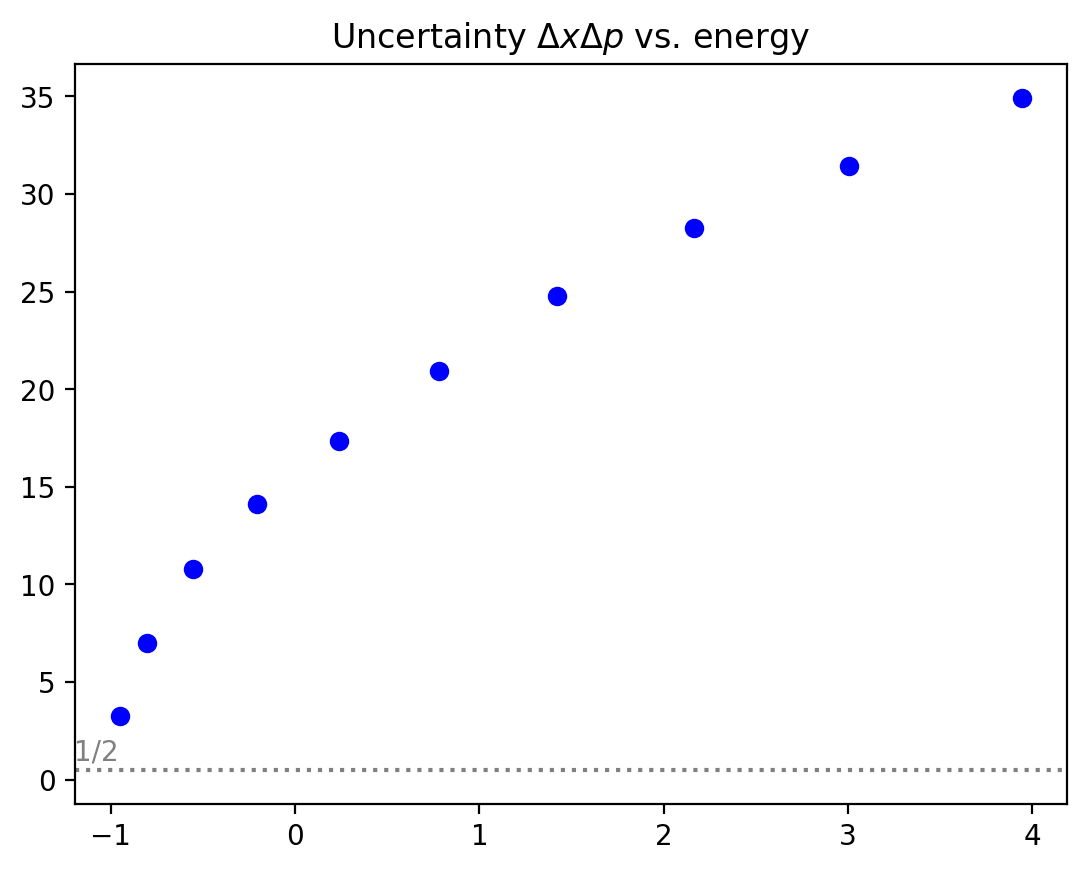

In [165]:
print(eigenEnergies)
plt.title("Uncertainty " + r"$\Delta x \Delta p$ vs. energy")

x = np.arange(0,1,1/N)
for e in eigenEnergies:
    psi = integratePsi(e, vwell)
    psi = normalize(psi)
    
    xSecondMoment = simpson(x * psi**2, dx = 1/N)

    pSecondMoment = -simpson(psi * d2(psi), dx = 1/N)

    deltaX = np.sqrt(xSecondMoment - 0.25)
    deltaP = np.sqrt(pSecondMoment)

    plt.plot(e, deltaX*deltaP, 'bo')

plt.axhline(0.5, linestyle="dotted", color='grey')
plt.text(-1.2, 1, "1/2", color='grey')

## 7 -- Harmonic Potential

#### analytic eigenenergies of harmonic potential:
[-0.910557, -0.731672, -0.552786, -0.373901, -0.195016, -0.0161301, 0.162755, 0.341641, 0.520526, 0.699412]

#### analytic eigene. of bounded HO:
no solution??

In [148]:
x = np.arange(0,1,1/N)
vharm = 8*(x-0.5)**2 - 1

gammaSquared = 1000


0.4999971181738708
[-0.9105572803258896, -0.7316718352317808, -0.552786242318153, -0.3738989006042475, -0.19499698913097313, -0.016005948448180374, 0.1633954845190057, 0.34423041872978305, 0.528873026394845, 0.7212788434028637, 0.9261541976690307, 1.1475298354148848, 1.3879378275155954, 1.6485601340770597, 1.9297785335779005, 2.23161820659635, 2.553982170414894, 2.8967491593837367, 3.259807468438104, 3.6430635063647703]


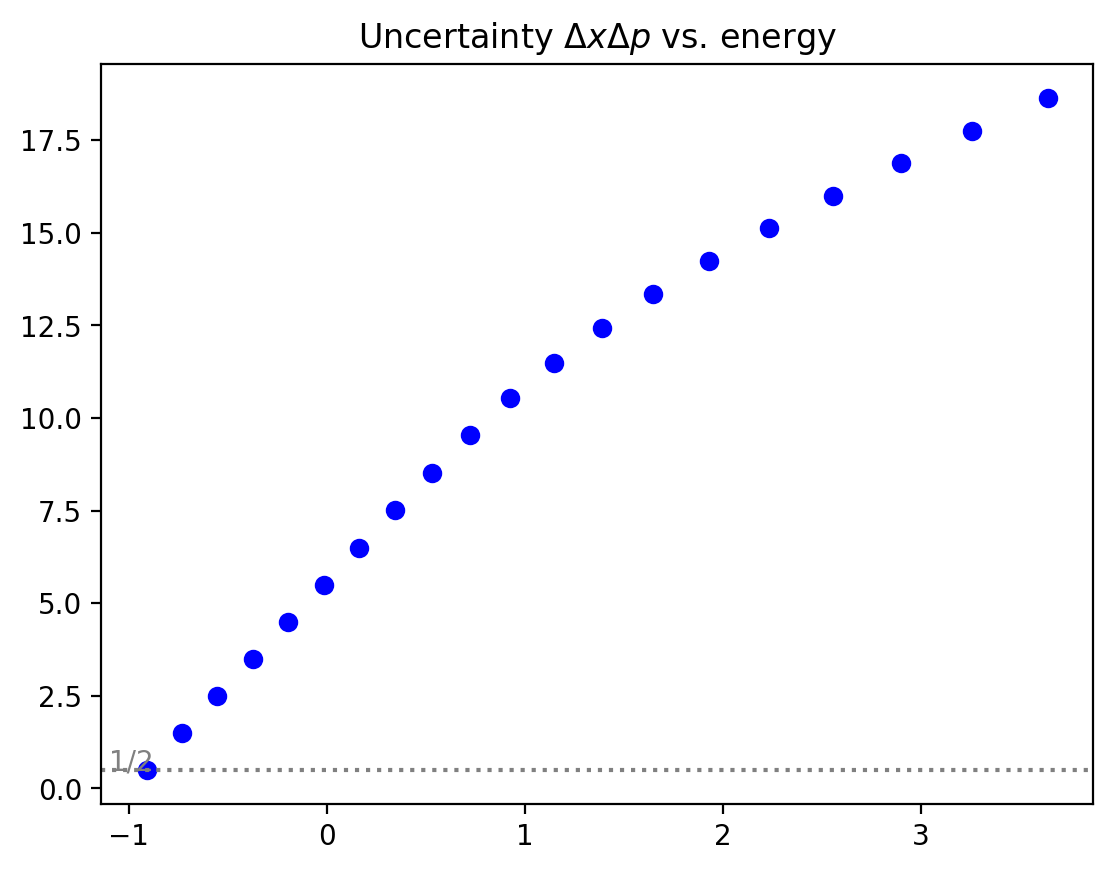

In [172]:
energy = -0.999
eigenEnergiesHarmonic = []
for i in range(20):
    energy = shoot(energy + 1e-4, vharm, tol=1e-9)
    eigenEnergiesHarmonic.append(energy)

    psi = integratePsi(energy, vharm)
    psi = normalize(psi)
    
    xSecondMoment = simpson(x**2 * psi**2, dx = 1/N)

    pSecondMoment = -simpson(psi * d2(psi), dx = 1/N)

    deltaX = np.sqrt(xSecondMoment - 0.25)
    deltaP = np.sqrt(pSecondMoment)

    plt.title("Uncertainty " + r"$\Delta x \Delta p$ vs. energy")
    plt.plot(energy, deltaX*deltaP, 'bo', linewidth=2)
    if i == 0:
        print(deltaX * deltaP)
    # if i>17:
    
    #     psi = integratePsi(energy)
    #     psi = normalize(psi)
    #     plt.plot(psi)


plt.axhline(0.5, linestyle="dotted", color='grey')
plt.text(-1.1, 0.5, "1/2", color='grey')
print(eigenEnergiesHarmonic)

1.0010010010010013


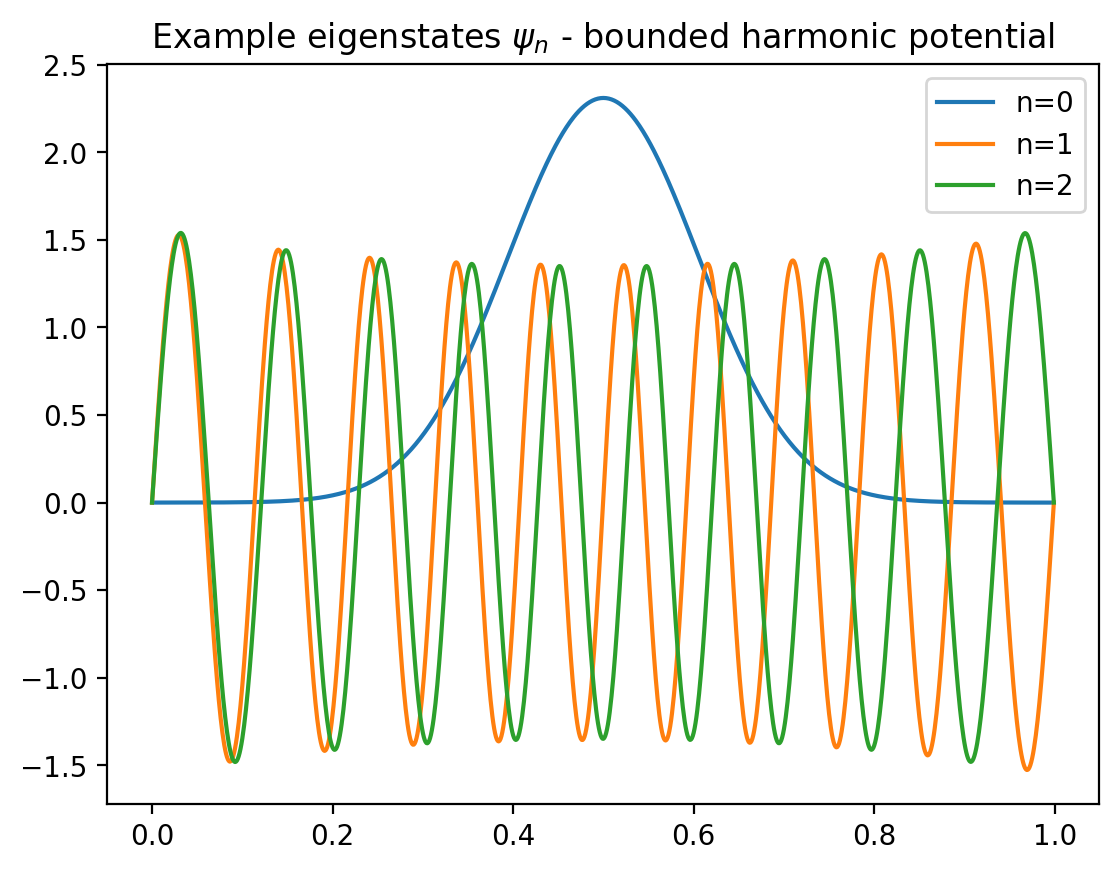

In [174]:
for i in range(3):
    plt.plot(x, normalize(integratePsi(eigenEnergiesHarmonic[-i], vharm)), label="n="+str(i))

plt.title("Example eigenstates " + r'$\psi_n$' + " - bounded harmonic potential")
plt.legend()
print(simpson(psi**2, dx=1/(N-1)))

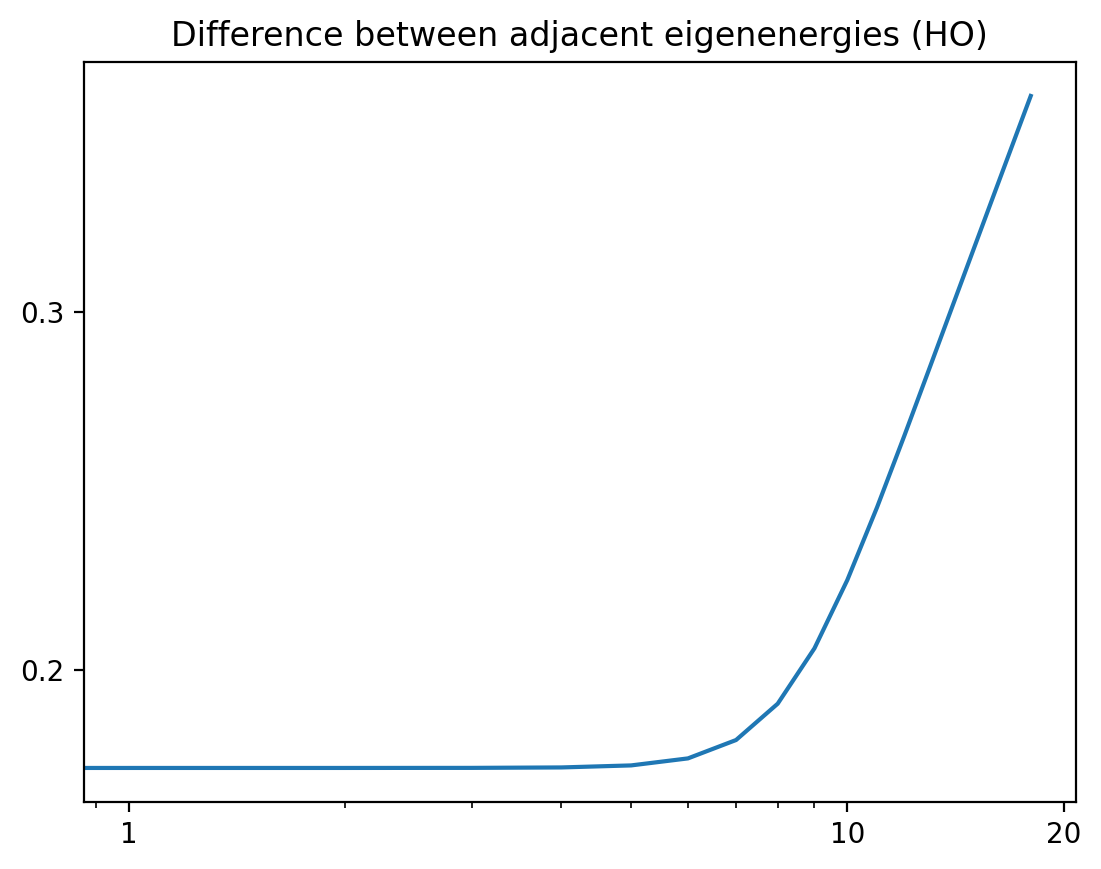

In [214]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()

ax.set(title="Difference between adjacent eigenenergies (HO)")
energyDiff = [eigenEnergiesHarmonic[i+1]-eigenEnergiesHarmonic[i] for i in range(len(eigenEnergiesHarmonic)-1)]
ax.plot(energyDiff)

ax.loglog()
ax.set_xticks([1,10,20],[1,10,20])
ax.set_yticks([0.2, 0.3, 0.4],[0.2, 0.3, 0.4])
# for axis in [ax.xaxis, ax.yaxis]:
#     axis.set_major_formatter(ScalarFormatter())